In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pickle

pickle_in=open('/content/drive/MyDrive/ML_Results_Main/X_SVM_Img_Pre.pickle','rb')
X = np.array(pickle.load(pickle_in))
pickle_in.close()

pickle_in=open('/content/drive/MyDrive/ML_Results_Main/Preprocessing/Y_SVM_Img_Pre.pickle','rb')
Y = np.array(pickle.load(pickle_in))
pickle_in.close()

print("Number of images in dataset: " ,len(X))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

X = 0  # To solve memory issue

image_size = X_train.shape[1]
input_size = image_size
print("Number of features in image: ", input_size)

X_train=np.reshape(X_train, [-1,input_size])
X_train=X_train.astype('float32')/255

X_test=np.reshape(X_test, [-1,input_size])
X_test=X_test.astype('float32')/255

svm = SVC(C = 10, kernel = 'linear')
svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)

print("Model Accuracy: ", accuracy*100,'%')

Number of images in dataset:  12540
Number of features in image:  42849
Model Accuracy:  78.03030303030303 %


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [8]:
y_pred = svm.predict(X_test)

In [9]:
print("Classification report for classifier %s:\n%s\n" % (
    svm, classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=10, kernel='linear'):
              precision    recall  f1-score   support

           0       0.77      0.45      0.57       802
           1       0.78      0.94      0.85      1706

    accuracy                           0.78      2508
   macro avg       0.77      0.69      0.71      2508
weighted avg       0.78      0.78      0.76      2508




In [10]:
################# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[ 361  441]
 [ 110 1596]]

Model accuracy:  0.7803030303030303


([0.22532402791625125,
  0.20837487537387836,
  0.21335992023928216,
  0.21734795613160518,
  0.21351674641148324,
  0.21116464528991527,
  0.21261748789518656,
  0.21271028037383177,
  0.2136685866194063,
  0.21251993620414672],
 [0.2332535885167464,
  0.21889952153110048,
  0.21730462519936203,
  0.21770334928229665,
  0.215311004784689,
  0.21610845295055822,
  0.21810207336523127,
  0.21850079744816586,
  0.21889952153110048,
  0.2196969696969697])

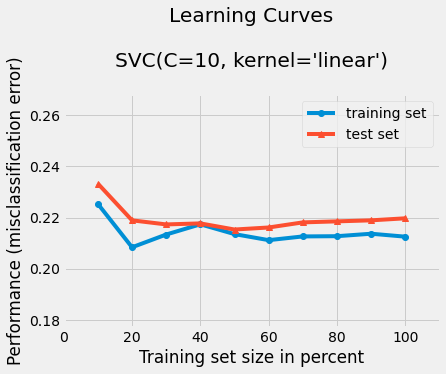

In [5]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, svm)

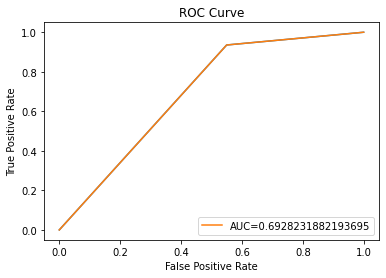

In [11]:
################## ROC Curve
y_pred = y_pred.ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [12]:
fileName = "/content/drive/MyDrive/ML_Results_Main/SVM_Img_78.03.model"
pickle.dump(svm, open(fileName, 'wb'))